# Notebook 1: Loading the CMIP historical data 

In this notebook, we focus on loading in the data from the CMIP6 site. We can then work on histogramming the data in order to understand the variability within the models

*Most of the code is from project pythia

In [30]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy

Pull the data from the sit itself and put into pandas df in order to be able to visualize it.

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


Look at the unique keys for all the entries in order to find the models we want

In [3]:
cmipdf = col.df
cmipdf['source_id'].unique()

array(['CMCC-CM2-HR4', 'EC-Earth3P-HR', 'HadGEM3-GC31-MM',
       'HadGEM3-GC31-HM', 'HadGEM3-GC31-LM', 'EC-Earth3P', 'ECMWF-IFS-HR',
       'ECMWF-IFS-LR', 'HadGEM3-GC31-LL', 'CMCC-CM2-VHR4', 'GFDL-CM4',
       'GFDL-AM4', 'IPSL-CM6A-LR', 'E3SM-1-0', 'CNRM-CM6-1', 'GFDL-ESM4',
       'GFDL-ESM2M', 'GFDL-CM4C192', 'GFDL-OM4p5B', 'GISS-E2-1-G',
       'GISS-E2-1-H', 'CNRM-ESM2-1', 'BCC-CSM2-MR', 'BCC-ESM1', 'MIROC6',
       'AWI-CM-1-1-MR', 'EC-Earth3-LR', 'IPSL-CM6A-ATM-HR', 'CESM2',
       'CESM2-WACCM', 'CNRM-CM6-1-HR', 'MRI-ESM2-0', 'SAM0-UNICON',
       'GISS-E2-1-G-CC', 'UKESM1-0-LL', 'EC-Earth3', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'CanESM5', 'CanESM5-CanOE', 'INM-CM4-8',
       'INM-CM5-0', 'NESM3', 'MPI-ESM-1-2-HAM', 'CAMS-CSM1-0',
       'MPI-ESM1-2-LR', 'MPI-ESM1-2-HR', 'MRI-AGCM3-2-H', 'MRI-AGCM3-2-S',
       'MCM-UA-1-0', 'INM-CM5-H', 'KACE-1-0-G', 'NorESM2-LM',
       'FGOALS-f3-H', 'FGOALS-g3', 'MIROC-ES2L', 'FIO-ESM-2-0', 'NorCPM1',
       'NorESM1-F', 'MPI-ESM1-2-XR'

From above, we know that we need 3 specific models/source_ids: CanESM5, HadGEM3-GC31-MM, GISS-E2-1-H. In addition to this, we know that we want monthly precipitation data, so we need variable_id = "pr" and table_id = "Amon". Lastly, we'll also need the historical data at this point.

# CanESM5

We want an approximate box of 115 to 135 lon and 49 to 60 lat, and we want a slice from 1960 to 2010

In [9]:
write = False
if write:
    can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
    can_bc_dset = can_dset.sel(lon = slice(225.,244.6875), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    print("got here")
    can_bc_dset.load().to_netcdf("can_bc_dset.nc")

Text(0, 0.5, 'Precipitation total (mm)')

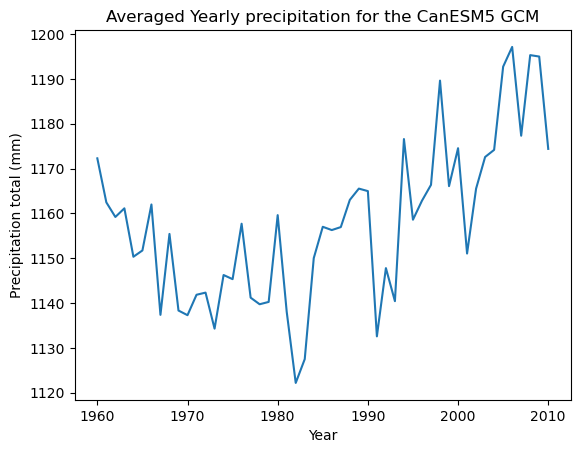

In [8]:
bc_dset = xr.open_dataset('can_bc_dset.nc')
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

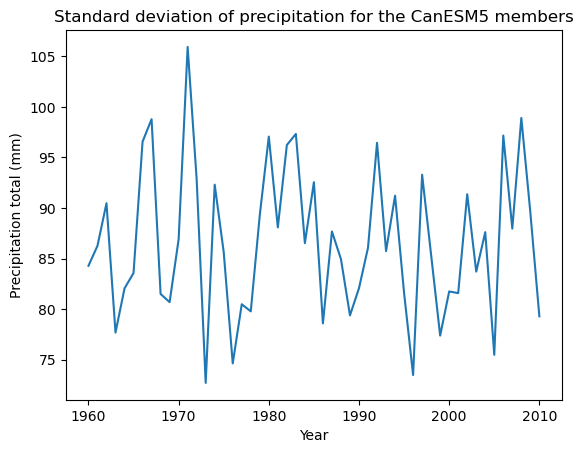

In [13]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
var_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the CanESM5 members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

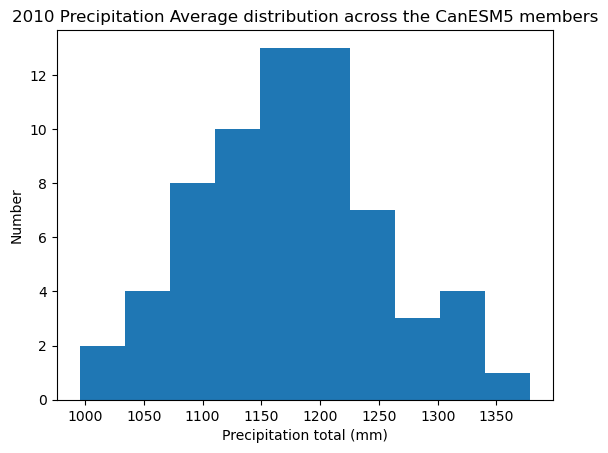

In [28]:
hist_data = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
hist_data = hist_data.sel(year=2010)
hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the CanESM5 members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

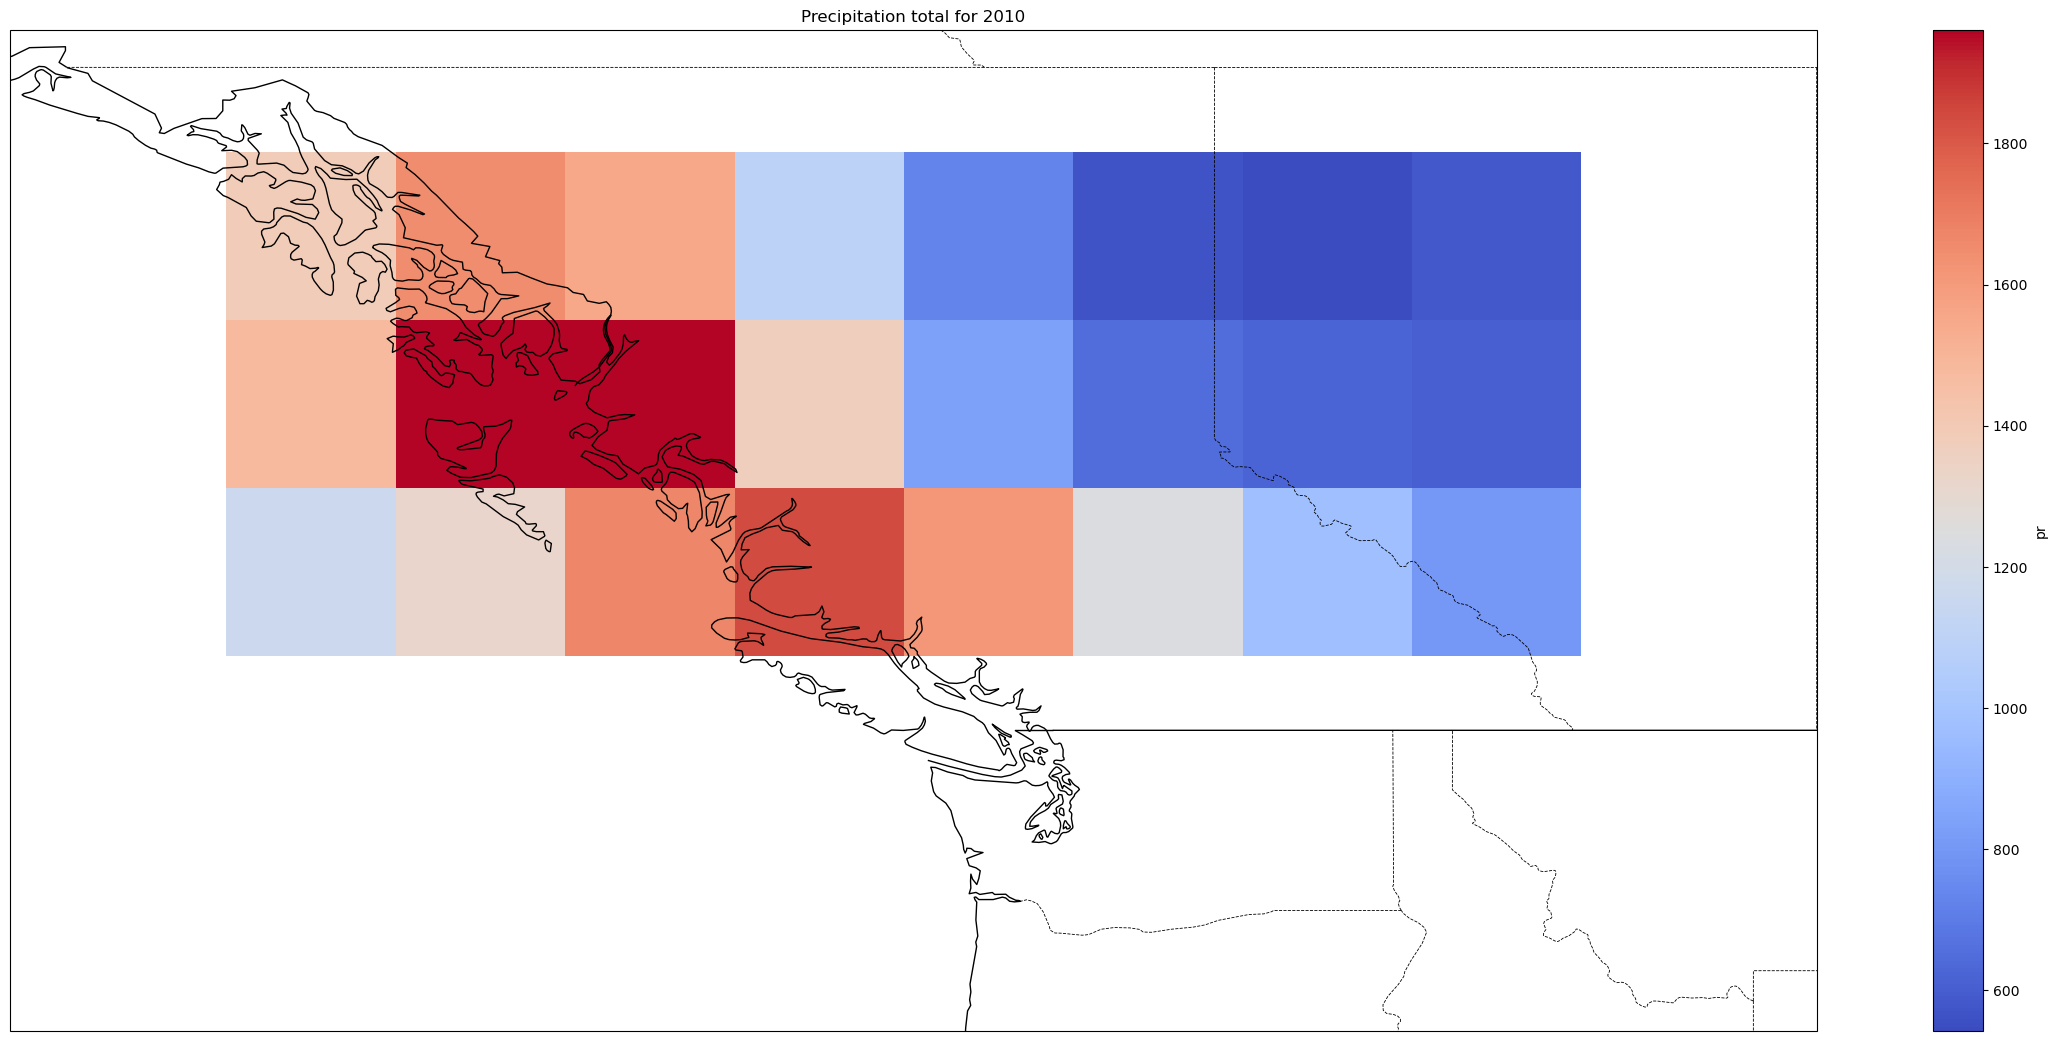

In [45]:
## Try plotting on a map for 2010

data2010 = bc_dset.sel(time='2010')
precip_data2010 = data2010.groupby('time.year').mean('time')*86400*365
precip_data2010 = precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 44, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



precip_data2010.pr.plot(ax=ax,cmap='coolwarm')
ax.title.set_text("Precipitation total for 2010")

# HadGEM3

In [50]:
hadGEM = False
if hadGEM:
    had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
    dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']
    had_bc_dset = had_dset.sel(lon = slice(225.4, 239.6), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    had_bc_dset.load().to_netcdf('had_bc_dset.nc')
    print('done')

Text(0, 0.5, 'Precipitation total (mm)')

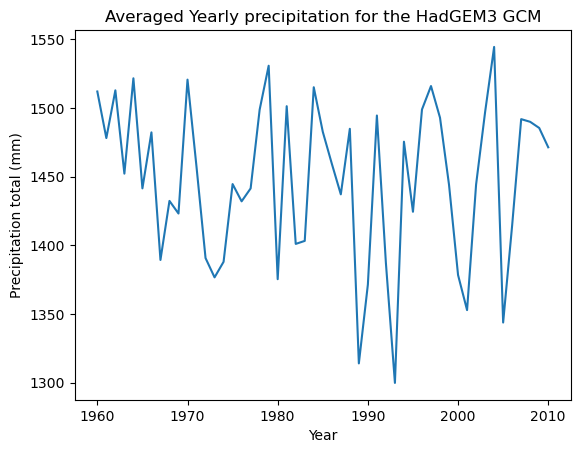

In [48]:
had_bc_dset = xr.open_dataset('had_bc_dset.nc')
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')


Text(0, 0.5, 'Precipitation total (mm)')

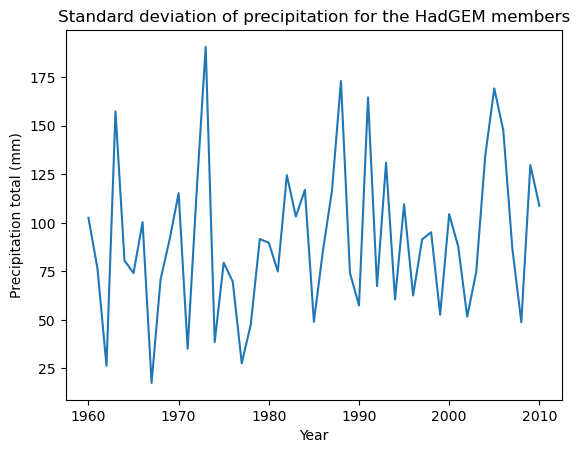

In [60]:
had_std_precip = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

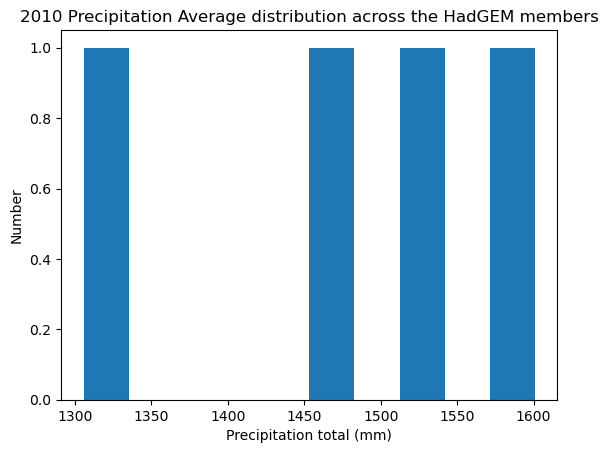

In [55]:
had_hist_data = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_hist_data = had_hist_data.sel(year=2010)
had_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the HadGEM members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

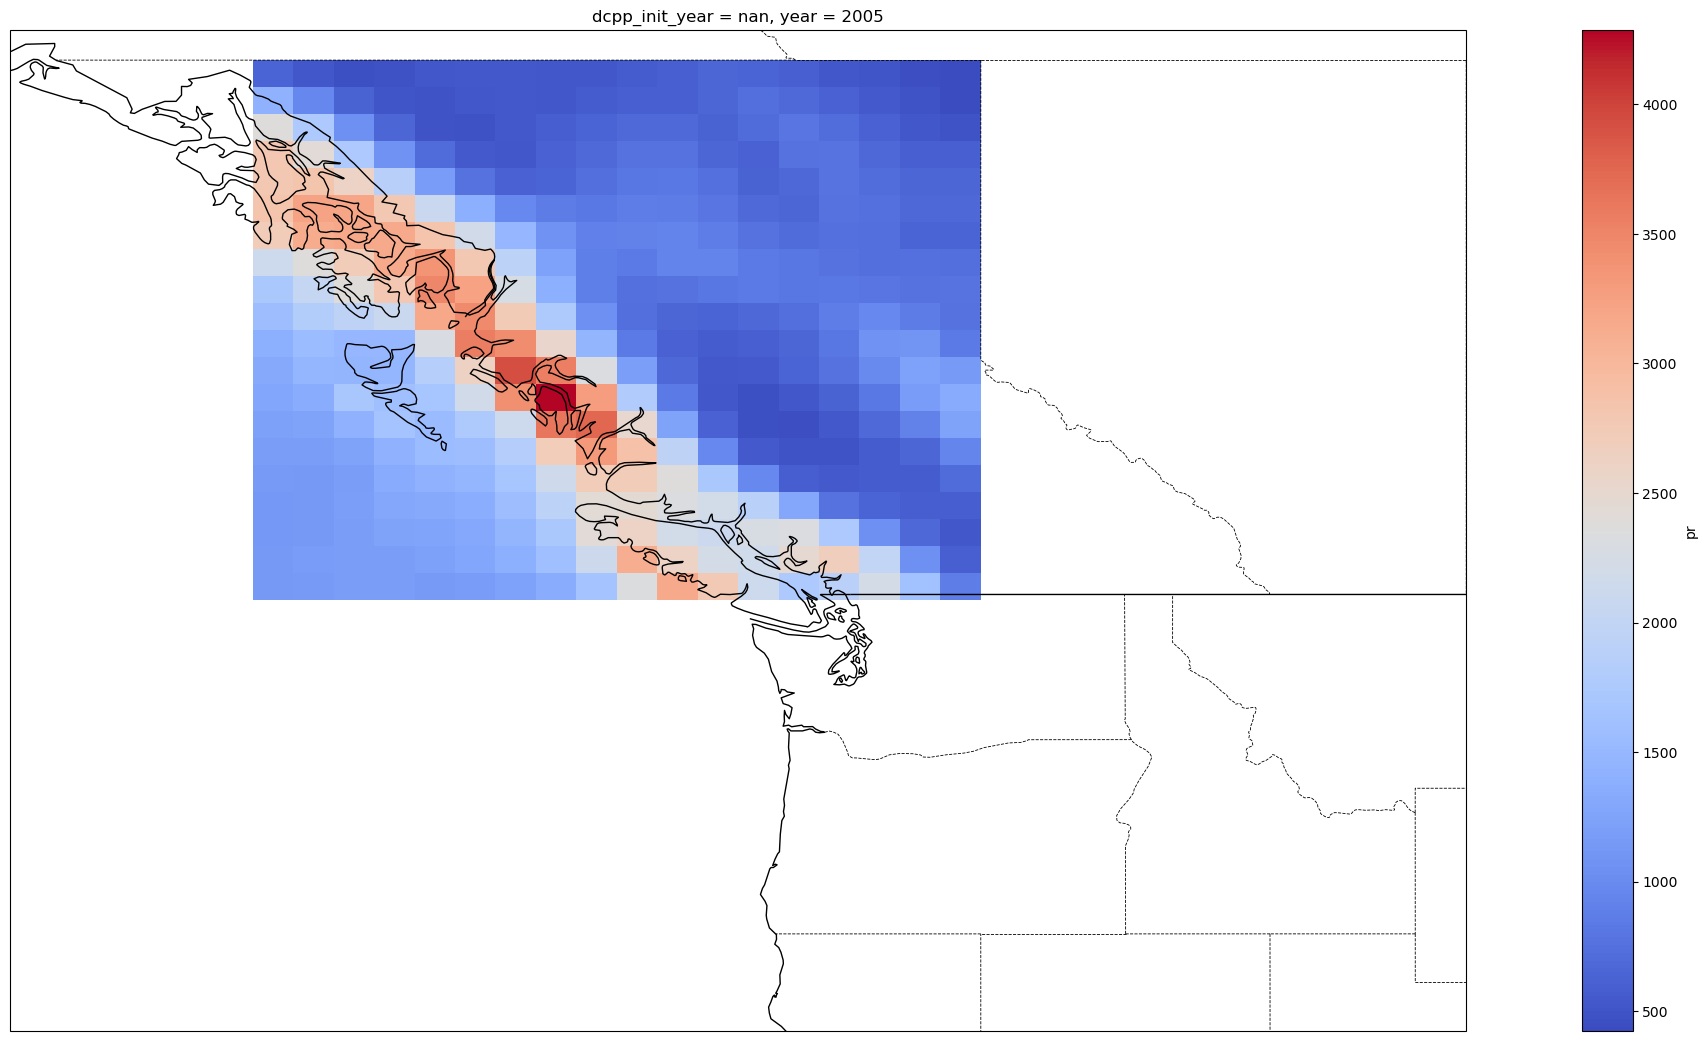

In [58]:
had_data2010 = had_bc_dset.sel(time='2005')
had_precip_data2010 = had_data2010.groupby('time.year').mean('time')*86400*365
had_precip_data2010 = had_precip_data2010.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax2 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax2.coastlines()
ax2.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax2.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax2.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



had_precip_data2010.pr.plot(ax=ax2,cmap='coolwarm')
ax.title.set_text("Precipitation total for 2010")

# GISS

In [49]:
GISS = False
if GISS:
    gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
    dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']
    gis_bc_dset = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    gis_bc_dset.load().to_netcdf('gis_bc_dset.nc')

Text(0, 0.5, 'Precipitation total (mm)')

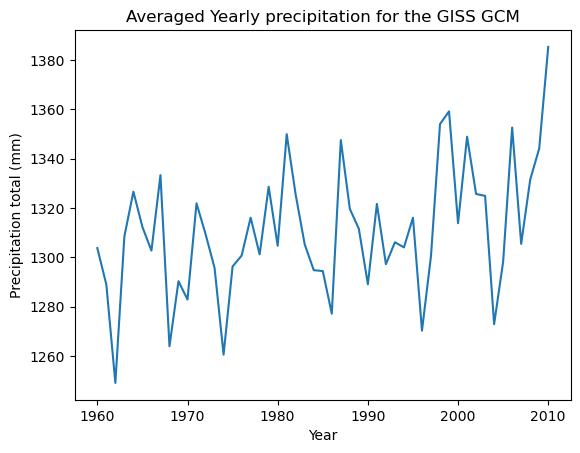

In [59]:
gis_bc_dset = xr.open_dataset('gis_bc_dset.nc')
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

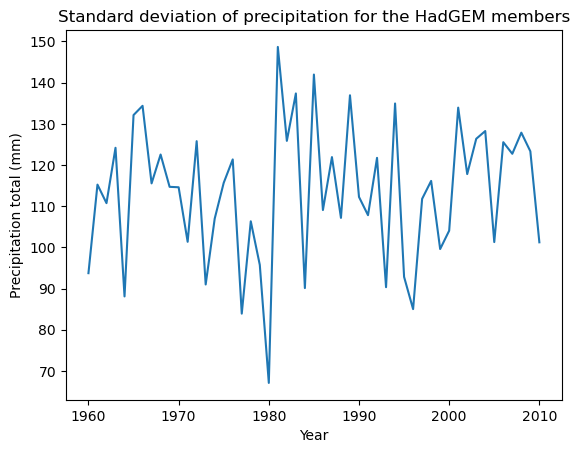

In [61]:
gis_std_precip = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

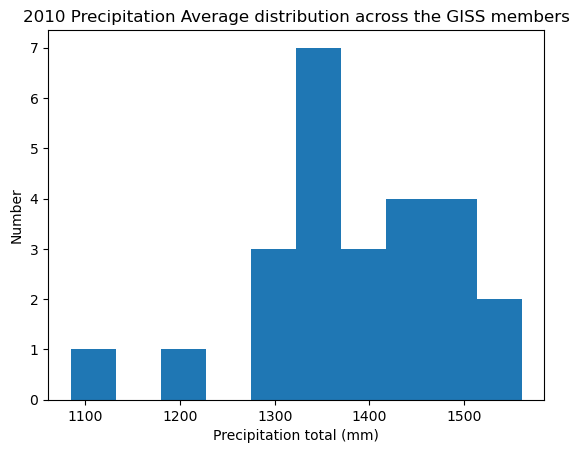

In [63]:
gis_hist_data = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_hist_data = gis_hist_data.sel(year=2010)
gis_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the GISS members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

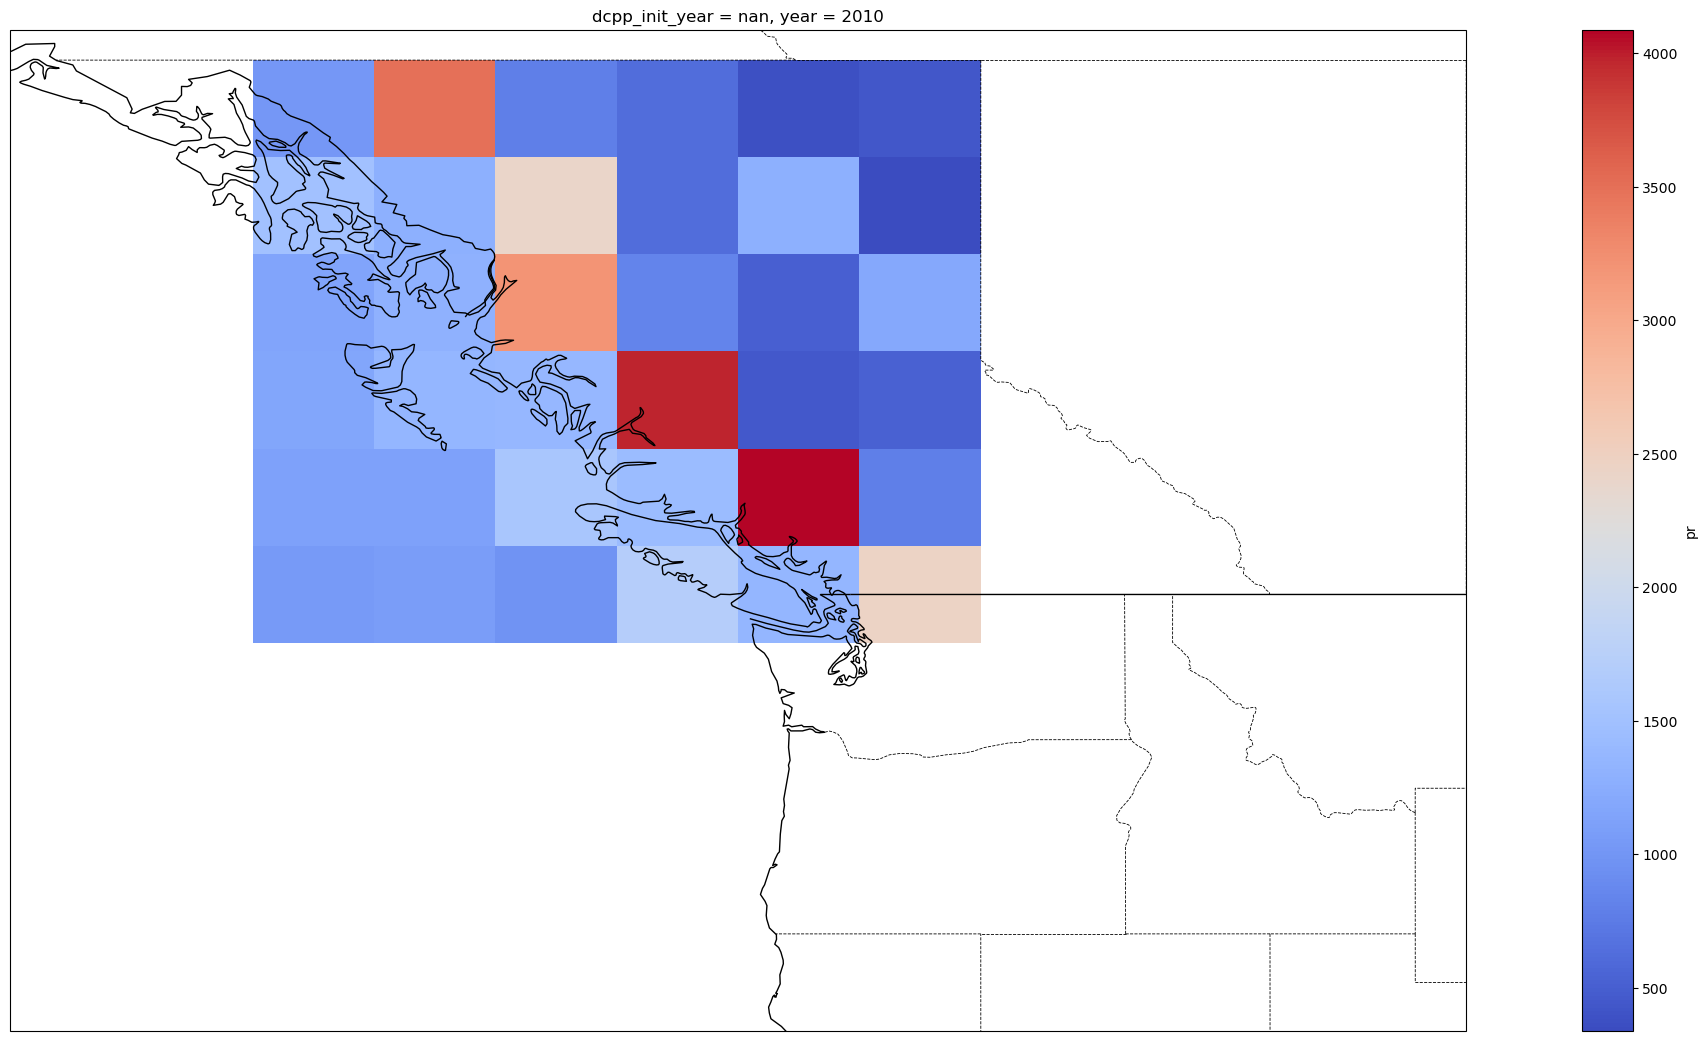

In [68]:
gis_data1990 = gis_bc_dset.sel(time='2010')
gis_precip_data1990 = gis_data1990.groupby('time.year').mean('time')*86400*365
gis_precip_data1990 = gis_precip_data1990.mean('member_id')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



gis_precip_data1990.pr.plot(ax=ax,cmap='coolwarm')

### CRU Historical Data

In [64]:
filename = "cru_ts4.02.2001.2010.pre.dat.nc"
cru_xr = xr.open_dataset(filename)

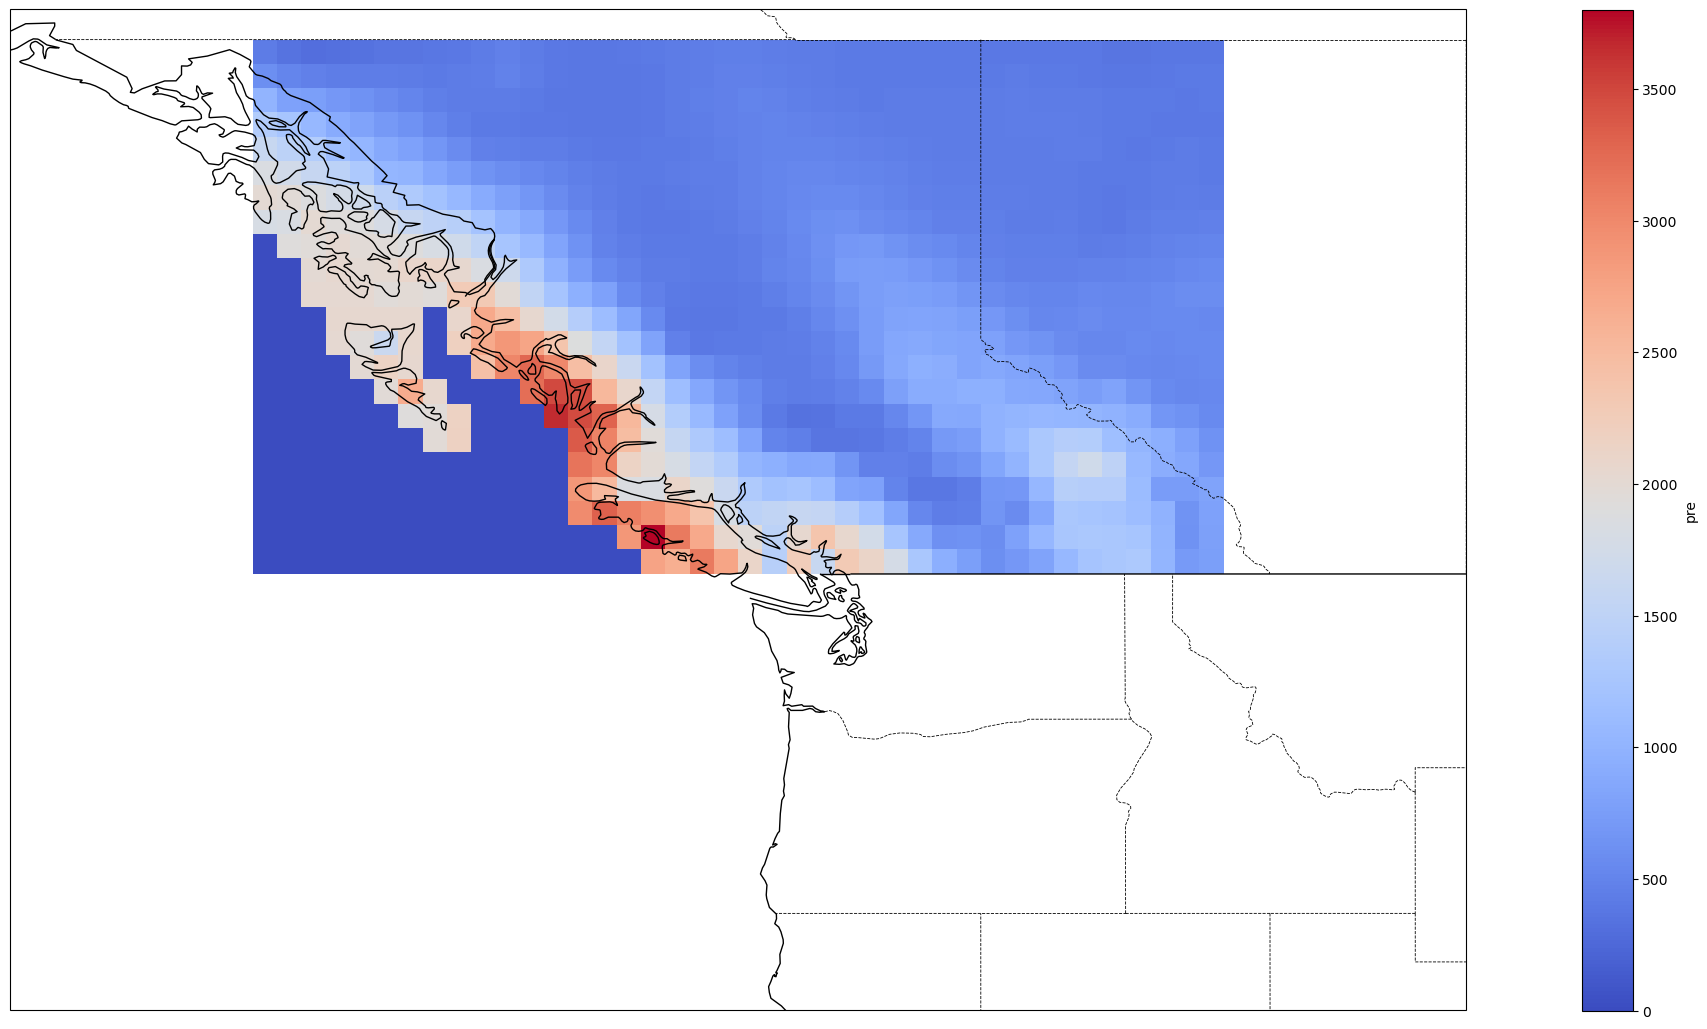

In [132]:
cru_2010 = cru_xr.pre.sel(time='2010', lon = slice(-134.75, -115.25), lat = slice(49.25, 59.75))
cru_plot = cru_2010.sum('time')

fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-140, -110, 40, 60])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)



cru_plot.plot(ax=ax,cmap='coolwarm')

Text(0, 0.5, 'Precipitation total (mm)')

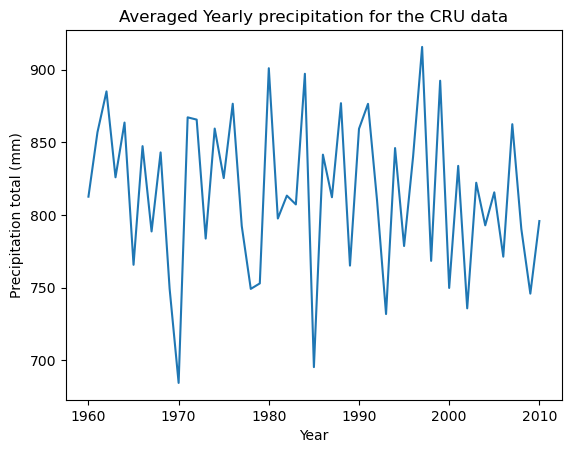

In [133]:
if False:
    filename= "cru_ts4.02.1901.2017.pre.dat.nc"
    cru_xr_hist = xr.open_dataset(filename)
    cru_9010 = cru_xr_hist.sel(time = slice('1960', '2010'), lon = slice(-134.75, -115.25), lat = slice(49.25, 59.75))
    cru_9010.load().to_netcdf('cru_6010.nc')

cru_6010 = xr.open_dataset('cru_6010.nc')
cru_6010 = cru_6010.groupby('time.year').sum('time').mean(['lon', 'lat'])
plt.figure()
cru_6010.pre.plot()
plt.title("Averaged Yearly precipitation for the CRU data")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')
# test = cru_6010.sel(time='2010').groupby('time.year').mean('time')
# test.dropna(dim='lat', how='any')

### Creating plots with all 3 models

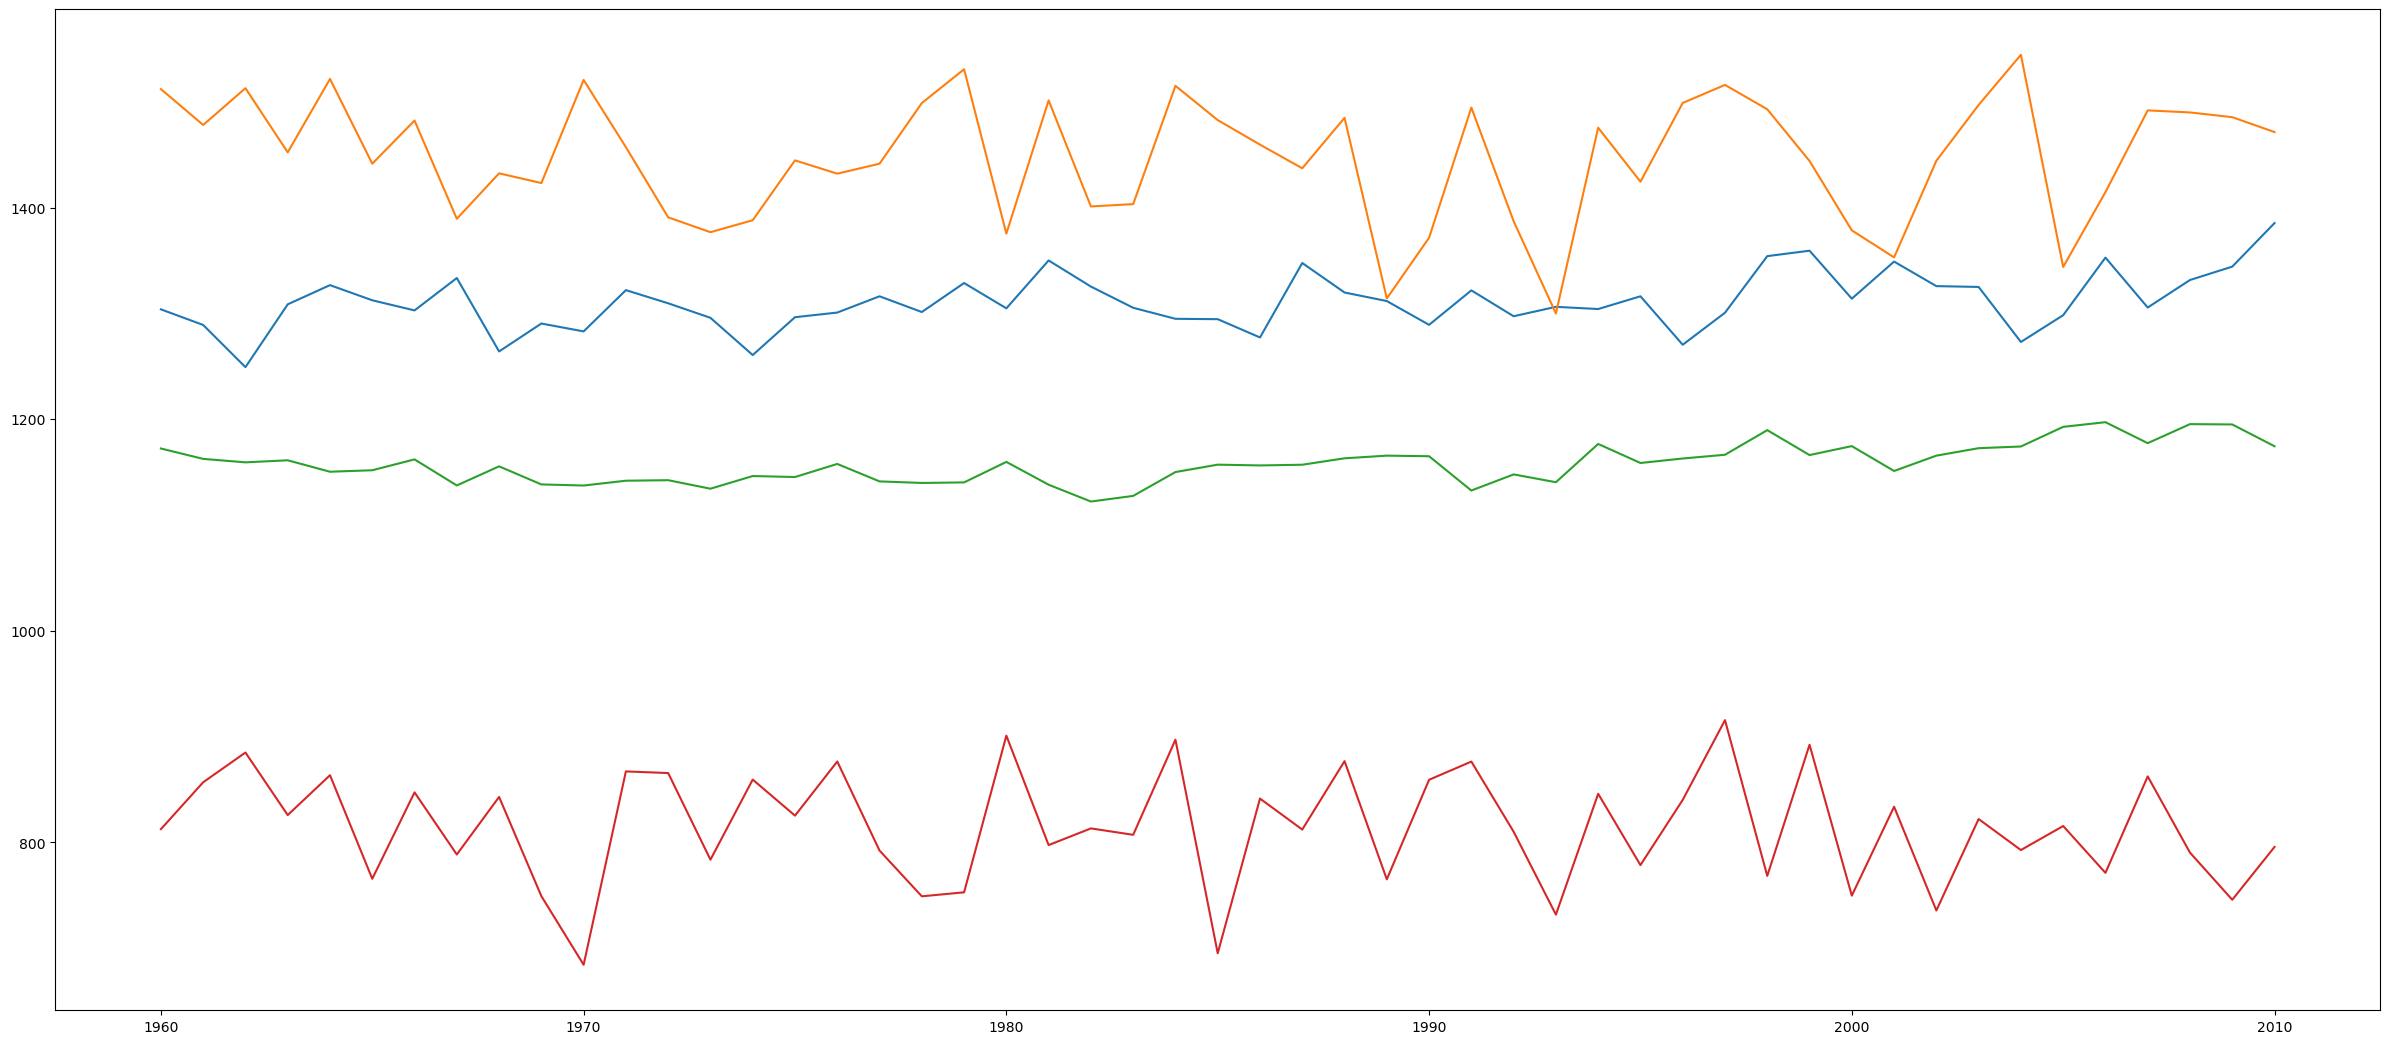

In [134]:
time = mean_precip_gis.year
fig, axs = plt.subplots(1, 1, figsize=(30, 13))
axs.plot(time,mean_precip_gis.mean('member_id').pr)
axs.plot(time, mean_precip_had.mean('member_id').pr)
axs.plot(time, mean_precip.mean('member_id').pr)
axs.plot(time, cru_6010.pre)